Image Automation Version 1:
Detects face of construction worker and based on face dimensions, resizes hard hat image.
Then randomizes location of the placement of hard hat on image and produces 10 new images
to augment to the image dataset.

When transfering to the server, make following changes:
imagePath = "VOC2028/JPEGImages/imageName.jpg"
tempImgName = "/home/anushka/Datasets/VOC2028/JPEGImages/SuperimposedImages/"

To do's:
1. Write method to ensure that hat is not placed on face
2. Train model using augmented dataset

In [15]:
#importing necessary packages
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from pylab import *
import random
import sys

In [16]:
#Load and treat image
#imagePath = "/Users/anushkavijay/Documents/HatDetection/VOC2028/JPEGImages/000478.jpg"

#name of image that will be saved
#imgName = "00478.jpg"


#hat path name
def hatInitialize():
    randomNum = random.randint(1,5)
    hatPath = "orangeHat.png"
    if(randomNum == 1):
        hatPath = "orangeHat.png"
    #if(randomNum == 2):
       # hatPath = "blueHat.png"
    if(randomNum == 3):
        hatPath = "pinkHat.png"
    if(randomNum == 4):
        hatPath = "limeHat.png"
    return hatPath



In [17]:
#face Detection algorithm
#Create cascade and initialize with face cascade
def faceDetection(imagePath):
    cascadePath = "/Users/anushkavijay/Documents/HatDetection/haarcascade_frontalface_default.xml"
    faceCascade = cv2.CascadeClassifier(cascadePath)

    #Read/Load the image
    print("imagePath = ", imagePath)
    image = cv2.imread(imagePath)
    plt.imshow(image, cmap='jet')
    #convert to grayscale
    grayScale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    #initialize empty faces
    faces = []
    
    #Detect faces in image
    faces = faceCascade.detectMultiScale(
        grayScale, 
        scaleFactor = 1.1, 
        minNeighbors = 5,
        minSize = (30,30),
        flags = cv2.CASCADE_SCALE_IMAGE
    )

    #Draw a rectangle around the faces using rectangle() function
    for(x, y, w, h) in faces:
        temp = cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    #display image
    plt.imshow(image, cmap='jet')

   # if not len(faces):
        #sys.exit()

    #faces
    if (not len(faces)):
        return 0,0, faces

    #average the width and height of all the faces
    avgWidth = 0
    avgHeight = 0
    #if len(faces) == 0
      #  helmetWidth = 124
       # helmetHeight = 104
    #else
    for(x, y, w, h) in faces:
        avgWidth += w
        avgHeight += h
        avgWidth = int(avgWidth/len(faces))
        avgHeight = int(avgHeight/len(faces))
        helmetWidth = round((124*avgWidth)/88)
        helmetHeight = round((104*avgHeight)/88)
        print(helmetWidth)
        print(helmetHeight)
    
    return helmetWidth, helmetHeight, faces

In [18]:
 #method for checking if hat is placed on coordinates of face
def checkOverlap(locX, locY, x, y, w, h):
    if(locX >= x and locX <= x+w and locY >= y and locY <= y+h):
        #hat location overlaps with face bounding box
        return True
    else:
        return False

In [19]:
def createHat(hatPath, helmetWidth, helmetHeight):
    helmetImage = cv2.imread(hatPath, cv2.IMREAD_UNCHANGED)
    #imshow(helmetImage)
    #show()

    new_helmet = cv2.resize(helmetImage, (helmetWidth, helmetHeight))
    imshow(new_helmet)
    show()
    cv2.imwrite("hat.png", new_helmet)

In [20]:
def placeHat(imagePath, imgName, faces):   
    hat = Image.open("hat.png")
    backgroundImage = Image.open(imagePath)

    #initialize location variables
    locationX = 0
    locationY = 0

    hatWidth = hat.size[0]
    hatHeight = hat.size[1]

    imageWidth = round((backgroundImage.size[0]-hatWidth)/100)
    imageHeight = round((backgroundImage.size[1]-hatHeight)/100)

    #for loop with randomizer -> run 10 times
    for i in range(1,11):
        print(i)
        #reset background image
        tempBack = Image.open(imagePath) 
        #initialize boolean variable for while loop
        isChecking = True
        #while loop to randomize location variable and check for overlap
        while(isChecking):
            #initialize location variables
            locationX = (random.randint(0,imageWidth))*100
            locationY = (random.randint(0,imageHeight))*100
            isOnFace = False
            #loop through each face and compare hat coordinates and face coordinates
            for(x,y,w,h) in faces:
                isOnFace = checkOverlap(locationX, locationY, x, y, w, h)
                #if overlap on even one face then generate a new location variable
                if(isOnFace == True):
                    break
            isChecking = isOnFace
        tempBack.paste(hat, (locationX,locationY), hat)
        tempImgName = "/Users/anushkavijay/Documents/HatDetection/VOC2028/JPEGImages" + imgName + "_" + str(i) + ".jpg"
        print(tempImgName)
        #save image to folder
        tempBack.save(tempImgName, "JPEG")
        imshow(tempBack)
        show()

/Users/anushkavijay/Documents/HatDetection/VOC2028/JPEGImages/PartA_01845.jpg
PartA_01845
imagePath =  /Users/anushkavijay/Documents/HatDetection/VOC2028/JPEGImages/PartA_01845.jpg
1
/Users/anushkavijay/Documents/HatDetection/VOC2028/JPEGImagesPartA_01845_1.jpg


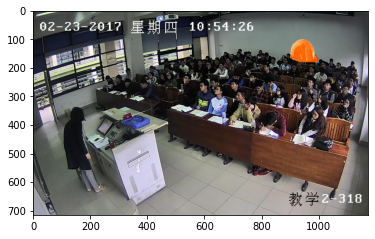

2
/Users/anushkavijay/Documents/HatDetection/VOC2028/JPEGImagesPartA_01845_2.jpg


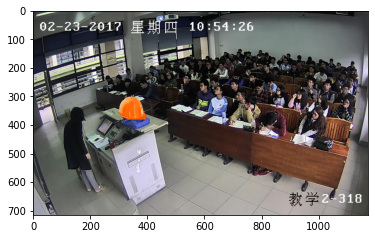

3
/Users/anushkavijay/Documents/HatDetection/VOC2028/JPEGImagesPartA_01845_3.jpg


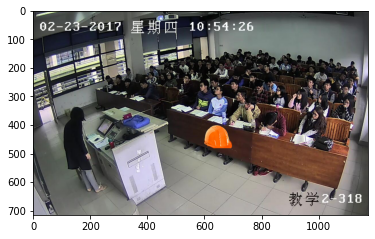

4
/Users/anushkavijay/Documents/HatDetection/VOC2028/JPEGImagesPartA_01845_4.jpg


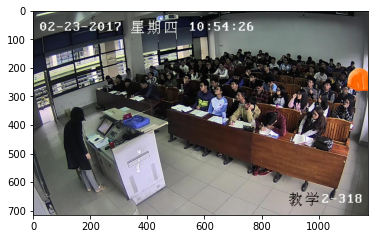

5
/Users/anushkavijay/Documents/HatDetection/VOC2028/JPEGImagesPartA_01845_5.jpg


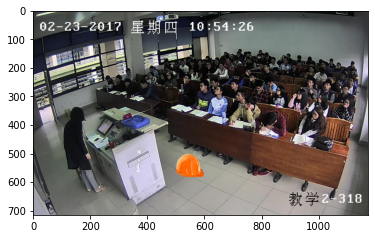

6
/Users/anushkavijay/Documents/HatDetection/VOC2028/JPEGImagesPartA_01845_6.jpg


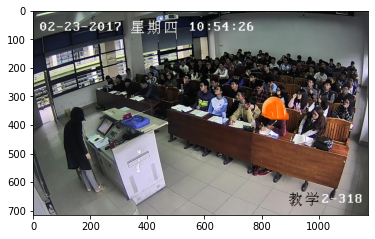

7
/Users/anushkavijay/Documents/HatDetection/VOC2028/JPEGImagesPartA_01845_7.jpg


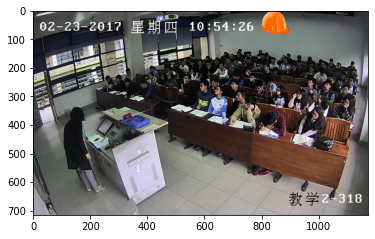

8
/Users/anushkavijay/Documents/HatDetection/VOC2028/JPEGImagesPartA_01845_8.jpg


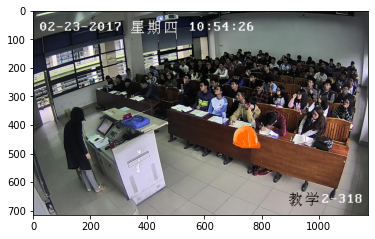

9
/Users/anushkavijay/Documents/HatDetection/VOC2028/JPEGImagesPartA_01845_9.jpg


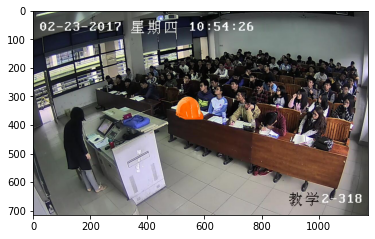

10
/Users/anushkavijay/Documents/HatDetection/VOC2028/JPEGImagesPartA_01845_10.jpg


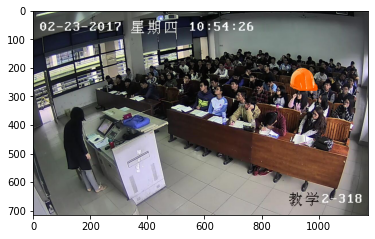

In [21]:
import os
count = 0
for dirname, _, filenames in os.walk('/Users/anushkavijay/Documents/HatDetection/VOC2028/JPEGImages'):
    for filename in filenames:
        count = count + 1
        if (count == 2):
            break
        print(os.path.join(dirname, filename))
        #name of image that will be saved
        imgName = filename.replace("/Users/anushkavijay/Documents/HatDetection/VOC2028/JPEGImages/", "")
        imgName = filename.replace(".jpg", "")
        
        print(imgName)
        #calls face detection algorithm
        helmetWidth = 0
        helmetHeight = 0
        #pass in file path
        helmetWidth, helmetHeight, faces = faceDetection(os.path.join(dirname, filename))
        #initialize the hat method
        hatPath = ""
        hatPath = hatInitialize()
        createHat = (hatPath, helmetWidth, helmetHeight)
        #calls method for placement of hat
        placeHat(os.path.join(dirname, filename), imgName, faces)